In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [3]:
base_model.trainable=False

In [4]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(128,activation='relu')(x)
predictions=Dense(10,activation='softmax')(x)

In [5]:
model=Model(inputs=base_model.input,outputs=predictions)

In [6]:
model.compile(optimizer=Adam(learning_rate=0.001),
                             loss='categorical_crossentropy',
                             metrics=['accuracy'])

In [7]:
datagen=ImageDataGenerator(rescale=1./255,
                           validation_split=0.2,
                           horizontal_flip=True,
                           zoom_range=0.2,
                           shear_range=0.2)

In [8]:
train_generator=datagen.flow_from_directory(
    "C:\\Users\Mayuri\\OneDrive\\Desktop\\DL\\raw-img",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 20947 images belonging to 10 classes.


In [9]:
validation_generator=datagen.flow_from_directory(
    "C:\\Users\Mayuri\\OneDrive\\Desktop\\DL\\raw-img",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 5232 images belonging to 10 classes.


In [10]:
history=model.fit(train_generator,validation_data=validation_generator,epochs=5)

Epoch 1/5


C:\Users\Mayuri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


655/655 ━━━━━━━━━━━━━━━━━━━━ 4178s 6s/step - accuracy: 0.8647 - loss: 0.4460 - val_accuracy: 0.9434 - val_loss: 0.1857
Epoch 2/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 1184s 2s/step - accuracy: 0.9442 - loss: 0.1748 - val_accuracy: 0.9406 - val_loss: 0.1848
Epoch 3/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 853s 1s/step - accuracy: 0.9507 - loss: 0.1459 - val_accuracy: 0.9463 - val_loss: 0.1676
Epoch 4/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 822s 1s/step - accuracy: 0.9616 - loss: 0.1144 - val_accuracy: 0.9482 - val_loss: 0.1583
Epoch 5/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 748s 1s/step - accuracy: 0.9591 - loss: 0.1204 - val_accuracy: 0.9532 - val_loss: 0.1500


In [15]:
test_loss,test_acc=model.evaluate(validation_generator)

164/164 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.9489 - loss: 0.1691


In [16]:
print("Test Loss:",test_loss)
print("\nTest Accuracy:",test_acc)

Test Loss: 0.15741173923015594

Test Accuracy: 0.9493501782417297


In [20]:
x_val,y_val=next(validation_generator)
predictions=model.predict(x_val)
predicted_labels=np.argmax(predictions,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 916ms/step


class_labels=list(train_generator.class_indices.keys())

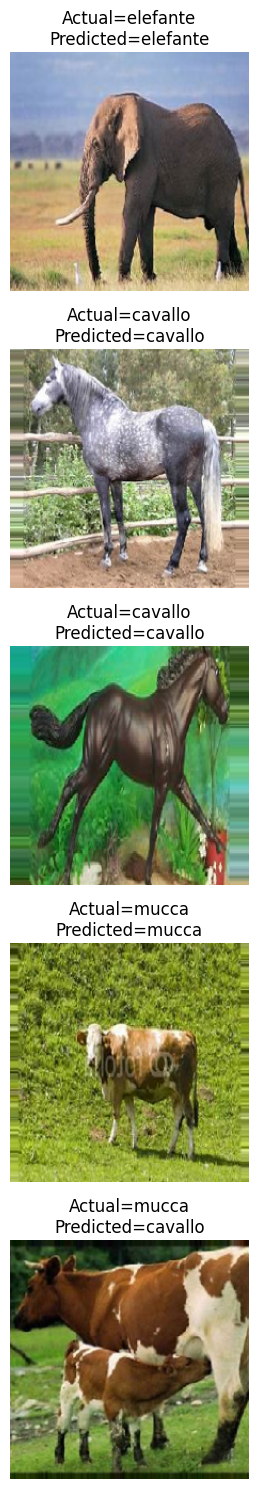

In [27]:
n=5
class_labels=list(train_generator.class_indices.keys())
plt.figure(figsize=(5,15))
for i in range(n):
    plt.subplot(n,1,i+1)
    plt.imshow(x_val[i])
    actual_label=class_labels[np.argmax(y_val[i])]
    predicted_label=class_labels[predicted_labels[i]]
    plt.title(f"Actual={actual_label}\nPredicted={predicted_label}")
    plt.axis("off")
plt.tight_layout()
plt.show()